# Quantum Parallelism
Quantum parallelism allows quantum computers to evaluate multiple inputs simultaneously using superposition. For example, in Deutsch's algorithm, a function $f: \{0, 1\} \rightarrow \{0, 1\}$ is applied to a superposition of inputs.

In [9]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [10]:
n = 2 # Number of input qubits

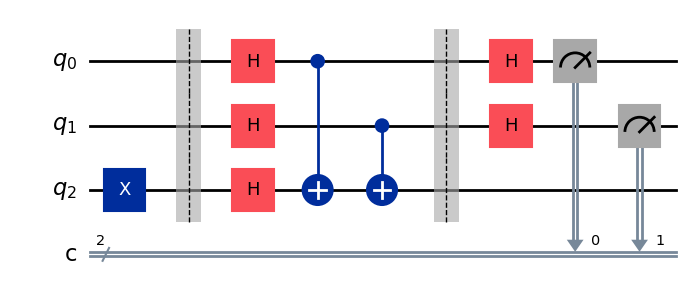

In [13]:
qc = QuantumCircuit(n + 1, n)
qc.x(n) # Initialize ancillary qubit as |1>
qc.barrier()
qc.h(range(n + 1)) # Apply Walsh-Hadamard to all qubits

for i in range(n):
    qc.cx(i, n) # Apply CNOT gates with control qubit i and target qubit n (balanced function)
qc.barrier()
qc.h(range(n)) # Apply Walsh-Hadamard to all qubits except last
qc.measure(range(n), range(n))
qc.draw(output='mpl')

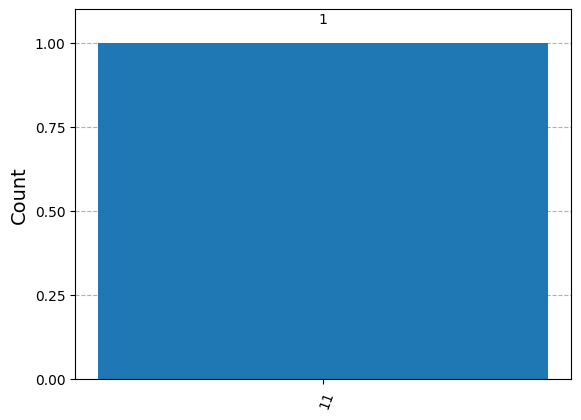

In [12]:
# Execute code on a simulator
backend = AerSimulator()
result = backend.run(qc, shots=1).result()
counts = result.get_counts()
plot_histogram(counts)

As all the results are 1, the function (CNOT) is a **balanced** function. Key point in this code is the evaluation of all qubits at the same time (one shot).